In [ ]:
import numpy as np
import pandas as pd
from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
from plotly import tools
#import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier, plot_importance
df=pd.read_csv(r'C:\Users\madiha\Desktop\dataset\AI-Data.csv')
df.head()

In [ ]:
df.rename(index=str, columns={'ParentschoolSatisfaction': 'satisfaction','ParentAnsweringSurvey': 'survey'}, inplace=True)
df.head()

Percentage 10    0.064583
70    0.064583
80    0.058333
72    0.035417
50    0.035417
        ...   
61    0.002083
83    0.002083
52    0.002083
67    0.002083
97    0.002083
Name: raisedhands, Length: 82, dtype: float64


<Axes: ylabel='raisedhands'>

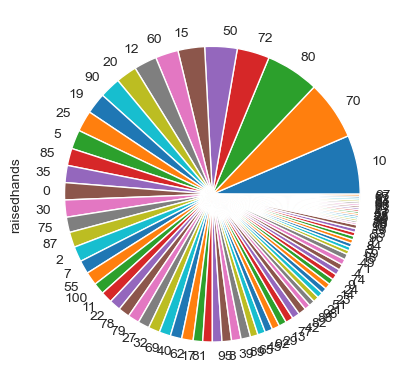

In [3]:
print('Percentage',df.raisedhands.value_counts(normalize=True) )
df.raisedhands.value_counts(normalize=True).plot(kind='pie')

In [4]:
df['raisedhands'].value_counts()

10    31
70    31
80    28
72    17
50    17
      ..
61     1
83     1
52     1
67     1
97     1
Name: raisedhands, Length: 82, dtype: int64

Percentage KuwaIT         0.375000
Jordan         0.366667
Iraq           0.045833
lebanon        0.039583
SaudiArabia    0.033333
USA            0.033333
Palestine      0.020833
Egypt          0.018750
Tunis          0.018750
Iran           0.012500
Syria          0.012500
Lybia          0.012500
Morocco        0.008333
venzuela       0.002083
Name: PlaceofBirth, dtype: float64


<Axes: >

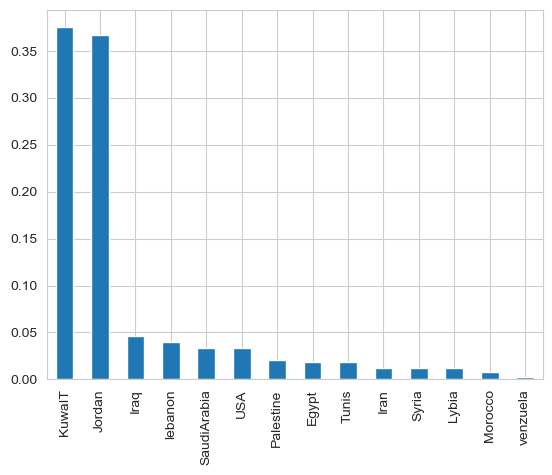

In [5]:
print('Percentage',df.PlaceofBirth.value_counts(normalize=True) )
df.PlaceofBirth.value_counts(normalize=True).plot(kind='bar')

<Axes: xlabel='Semester', ylabel='count'>

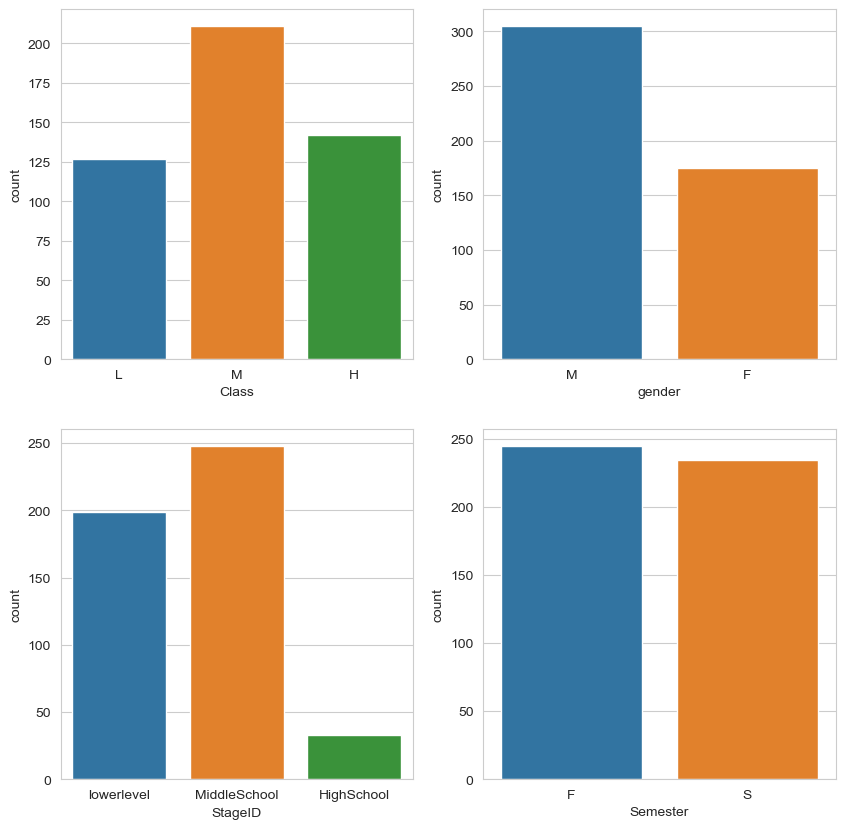

In [6]:
fig, axarr = plt.subplots(2,2,figsize=(10,10))
sns.countplot(x='Class', data=df, ax=axarr[0,0], order=['L','M','H'])
sns.countplot(x='gender', data=df, ax=axarr[0,1],order=['M','F'])
sns.countplot(x='StageID', data=df, ax=axarr[1,0])
sns.countplot(x='Semester', data=df, ax=axarr[1,1])

<Axes: xlabel='NationalITy', ylabel='count'>

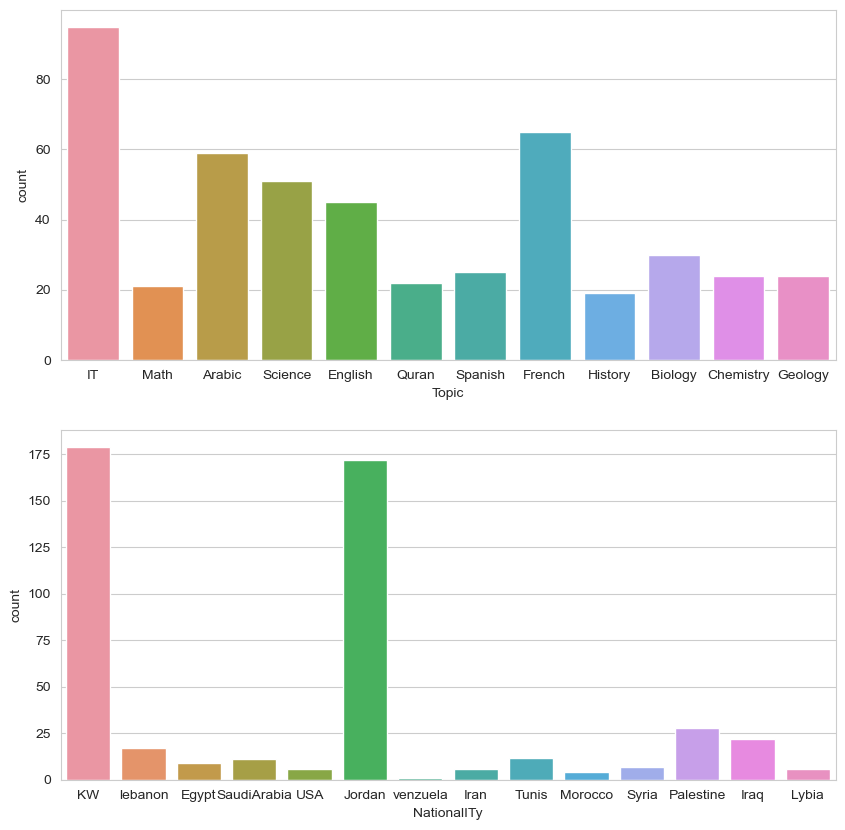

In [7]:
fig, (axis1, axis2) = plt.subplots(2,1,figsize=(10,10))
sns.countplot(x='Topic', data=df , ax=axis1)
sns.countplot(x='NationalITy', data=df , ax=axis2)

<Axes: xlabel='NationalITy', ylabel='count'>

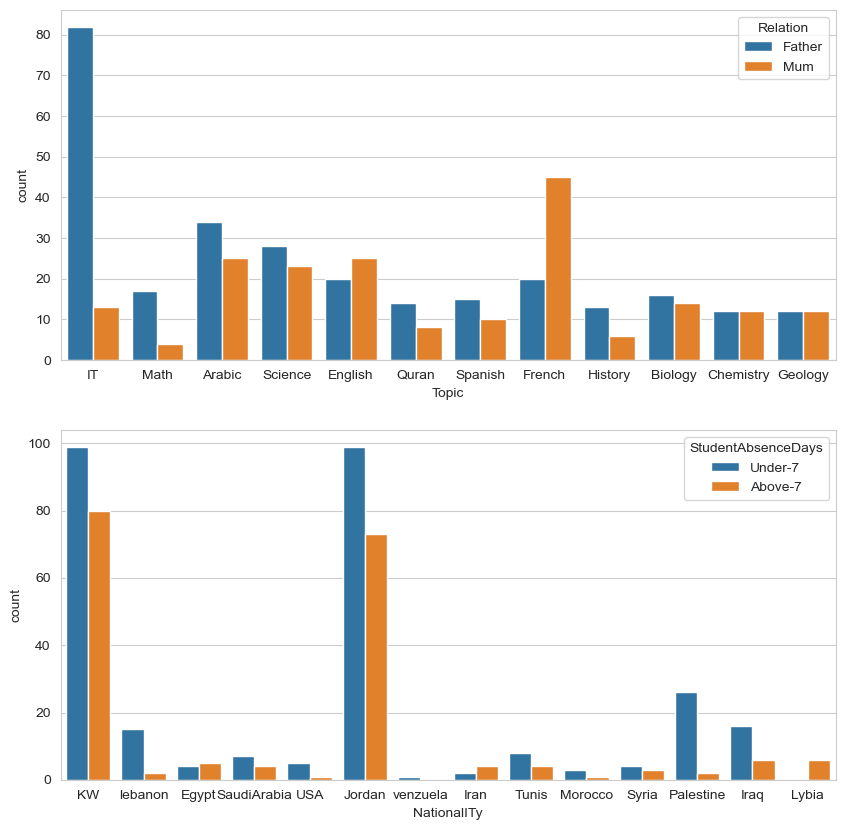

In [8]:
fig, (axis1, axis2) =plt.subplots(2,1,figsize=(10,10))
sns.countplot(x='Topic', hue='Relation', data=df ,ax=axis1)
sns.countplot(x='NationalITy', hue='StudentAbsenceDays', data=df ,ax=axis2)

<Axes: xlabel='AnnouncementsView', ylabel='Discussion'>

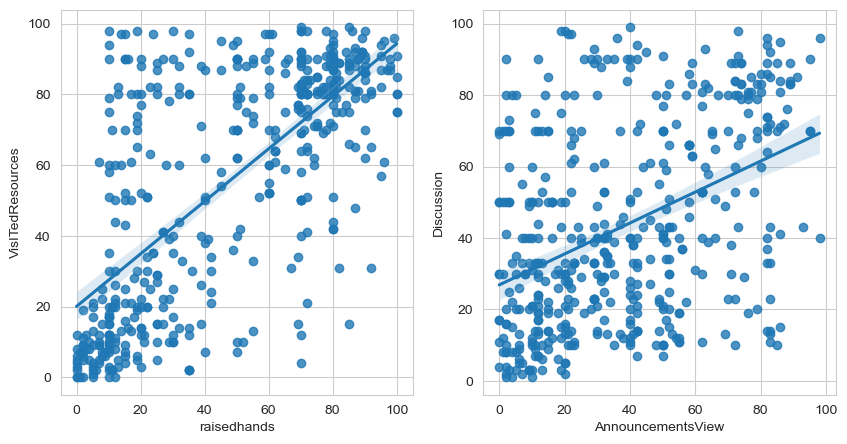

In [9]:
#feature
fig, (axis1, axis2) = plt.subplots(1,2,figsize=(10,5))
sns.regplot(x='raisedhands', y='VisITedResources', data=df ,ax=axis1)
sns.regplot(x='AnnouncementsView', y='Discussion', data=df ,ax=axis2)

C:\Users\madiha\AppData\Local\Temp\ipykernel_528\3375072611.py:5: DeprecationWarning:

info is deprecated and will be removed in version 3.0.




Graph with 16 nodes and 26 edges


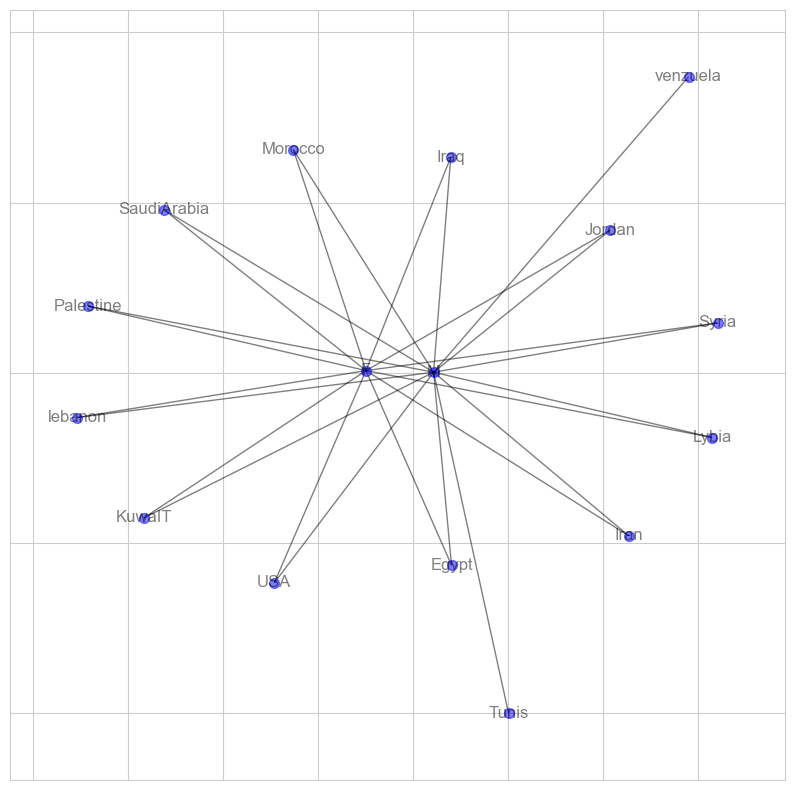

In [10]:
import networkx as nx

g= nx.Graph()
g = nx.from_pandas_edgelist(df,source='gender',target='PlaceofBirth')
print (nx.info(g))


plt.figure(figsize=(10,10)) 
nx.draw_networkx(g,with_labels=True,node_size=50, alpha=0.5, node_color="blue")
plt.show()

In [11]:
Features = df.drop('gender',axis=1)
Target = df['gender']
label = LabelEncoder()
Cat_Colums = Features.dtypes.pipe(lambda Features: Features[Features=='object']).index
for col in Cat_Colums:
    Features[col] = label.fit_transform(Features[col])
    

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Features, Target, test_size=0.2, random_state=52)

In [13]:

Logit_Model = LogisticRegression(max_iter=1000)
Logit_Model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [14]:
Prediction= Logit_Model.predict(X_test)
Prediction

array(['M', 'F', 'M', 'M', 'M', 'M', 'M', 'F', 'M', 'M', 'M', 'M', 'F',
       'M', 'M', 'M', 'M', 'F', 'F', 'M', 'F', 'F', 'M', 'M', 'M', 'M',
       'F', 'F', 'F', 'M', 'F', 'F', 'M', 'M', 'M', 'M', 'M', 'M', 'F',
       'M', 'M', 'M', 'M', 'F', 'F', 'M', 'M', 'M', 'M', 'M', 'F', 'F',
       'M', 'M', 'F', 'M', 'F', 'M', 'M', 'M', 'M', 'F', 'M', 'M', 'F',
       'M', 'M', 'M', 'F', 'F', 'M', 'F', 'M', 'M', 'F', 'F', 'F', 'F',
       'F', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'F', 'M', 'M'], dtype=object)

In [15]:
Report = classification_report(y_test,Prediction)
print(Report)

              precision    recall  f1-score   support

           F       0.53      0.50      0.52        32
           M       0.76      0.78      0.77        64

    accuracy                           0.69        96
   macro avg       0.65      0.64      0.64        96
weighted avg       0.68      0.69      0.68        96



In [16]:
Score = accuracy_score(y_test,Prediction)
print(Score)

0.6875


In [17]:
import xgboost as xgb
model_xgb = xgb.XGBClassifier(max_dept=10, learnng_rate=0.1, n_estimators=1000, seed=10)
xgb_pred = model_xgb.fit(X_train, y_train).predict(X_test)

ModuleNotFoundError: No module named 'xgboost'